In [ ]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [1]:
from xopt import Xopt
from xopt.tools import load_config, random_settings

In [2]:
X = Xopt('xopt-TNK.yaml')
X

Loading xopt-TNK.yaml as YAML 
Simulation test_TNK configured



            Xopt
________________________________           

Configured: True

Config as YAML:
xopt: {output_path: null, verbose: true, algorithm: cnsga}
cnsga: {max_generations: 50, population_size: 64, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true}
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: MINIMIZE, y2: MINIMIZE}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [GREATER_THAN, 0]
  linked_variables: {x9: x1}
  constants: {a: dummy_constant}

In [3]:
X.random_inputs()

{'x1': 2.93143677024644,
 'x2': 2.077456852601026,
 'a': 'dummy_constant',
 'x9': 2.93143677024644}

In [4]:
X.random_evaluate()

{'y1': 0.7428807966338917,
 'y2': 0.028789793181591847,
 'c1': -0.5287011762605568,
 'c2': 0.21896985961663915}

In [5]:
from concurrent.futures import ProcessPoolExecutor
executor = ProcessPoolExecutor()

In [6]:
X.run_cnsga(executor)




 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continous Non-dominated Sorting Genetic Algorithm


Creating toolbox from vocs.
Created toolbox with 2 variables, 2 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'a': 'dummy_constant'},
 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['GREATER_THAN', 0]},
 'description': None,
 'linked_variables': {'x9': 'x1'},
 'name': 'TNK_test',
 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'},
 'simulation': 'test_TNK',
 'templates': None,
 'variables': {'x1': [0, 3.14159], '

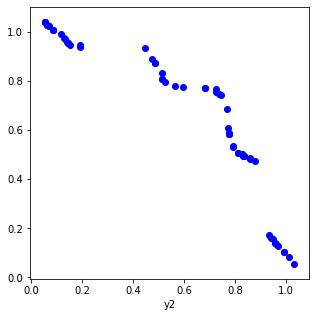

In [7]:
# Extract ovjectives from output
key1, key2 = list(X.vocs['objectives'])
x, y = X.population['outputs'][key1], X.population['outputs'][key2]

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(x, y, color='blue')
#ax.set_xlim(X_RANGE)
#ax.set_ylim(Y_RANGE)
ax.set_xlabel(key1)
ax.set_xlabel(key2)
ax.set_aspect('auto')
#ax.set_title(NAME)

In [ ]:
X.population

In [ ]:
!ls /Users/chrisonian/Code/GitHub/xopt/examples/kekgun/